### Some Source:
- https://stackabuse.com/statistical-hypothesis-analysis-in-python-with-anovas-chi-square-and-pearson-correlation/
- https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
- https://www.reneshbedre.com/blog/anova.html

In [ ]:
#!pip install statsmodels
#!pip install bioinfokit

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [2]:
import xgboost
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel

In [3]:
import scipy

import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import regplot

from datetime import datetime
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import xgboost
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Country Keys:

## country_list = ['France', 'Finland', 'Germany','United Kingdom']


In [4]:
df = pd.read_csv('index.csv')
#df = df[df['country_name'].isin(country_list)]

Fr_keys = df[df['country_name'] == 'France']['key'].to_list()
Fi_keys = df[df['country_name'] == 'Finland']['key'].to_list()
Gr_keys = df[df['country_name'] == 'Germany']['key'].to_list()
En_keys = df.query("country_code == 'GB' & subregion1_code == 'ENG'")['key'].to_list()

In [5]:
# All columns are categorical

gov_df = pd.read_csv('oxford-government-response.csv')

cols = ['date','key','school_closing','workplace_closing','cancel_public_events','restrictions_on_gatherings',
        'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 
        'international_travel_controls']

Fr_gov = gov_df[gov_df['key'].isin(Fr_keys)][cols]#No Nan
Fi_gov = gov_df[gov_df['key'].isin(Fi_keys)][cols]#No Nan
Gr_gov = gov_df[gov_df['key'].isin(Gr_keys)][cols]#No Nan
En_gov = gov_df[gov_df['key'].isin(En_keys)][cols]#There is Nan 2 rows

In [6]:
def get_Countries_goverment():
    df = pd.read_csv('index.csv')
    
    Fr_keys = df[df['country_name'] == 'France']['key'].to_list()
    Fi_keys = df[df['country_name'] == 'Finland']['key'].to_list()
    Gr_keys = df[df['country_name'] == 'Germany']['key'].to_list()
    En_keys = df.query("country_code == 'GB' & subregion1_code == 'ENG'")['key'].to_list()
    
    gov_df = pd.read_csv('oxford-government-response.csv')

    cols = ['date','key','school_closing','workplace_closing','cancel_public_events','restrictions_on_gatherings',
            'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 
            'international_travel_controls']

    Fr_gov = gov_df[gov_df['key'].isin(Fr_keys)][cols]#No Nan
    Fi_gov = gov_df[gov_df['key'].isin(Fi_keys)][cols]#No Nan
    Gr_gov = gov_df[gov_df['key'].isin(Gr_keys)][cols]#No Nan
    En_gov = gov_df[gov_df['key'].isin(En_keys)][cols]#There is Nan 2 rows

    return Fr_gov, Fi_gov, Gr_gov, En_gov

In [8]:
def missing_values_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column name': df.columns,'percentage of missing': percent_missing})
    return missing_value_df

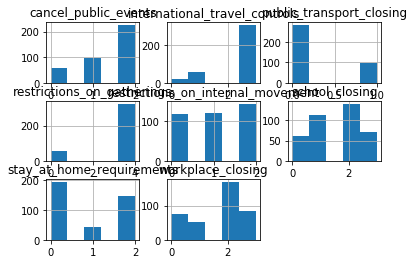

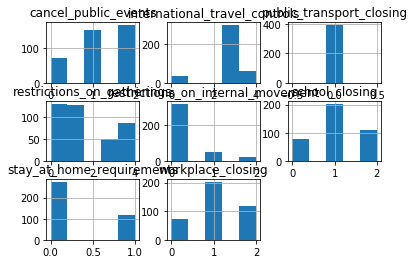

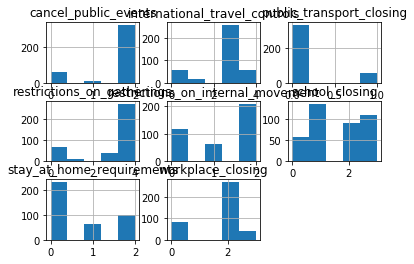

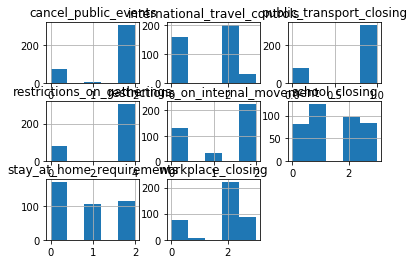

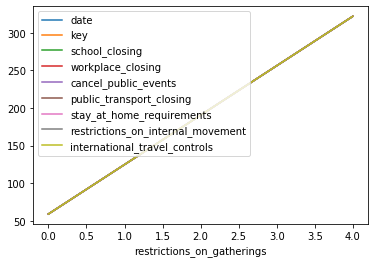

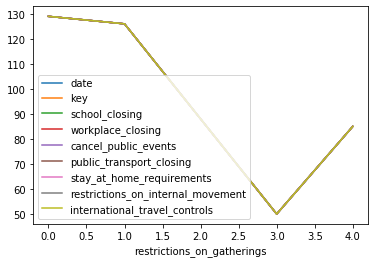

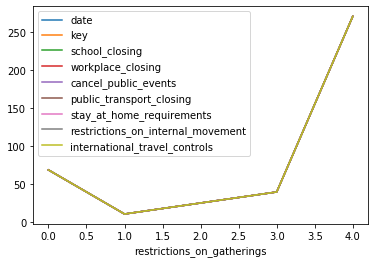

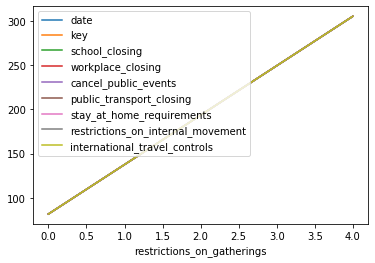

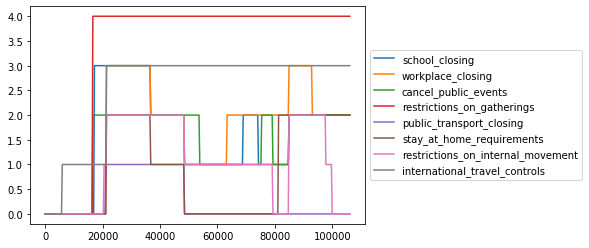

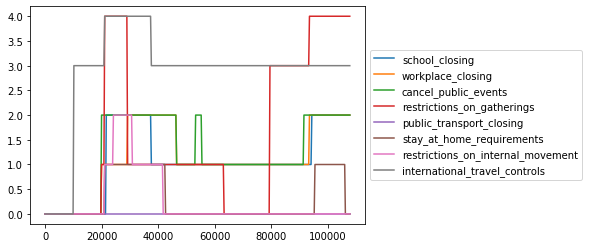

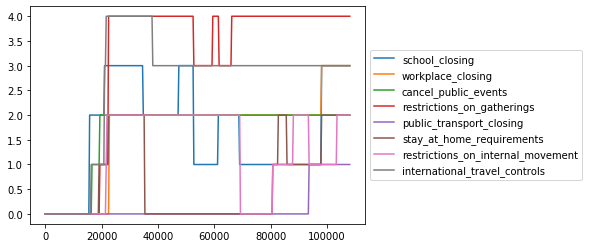

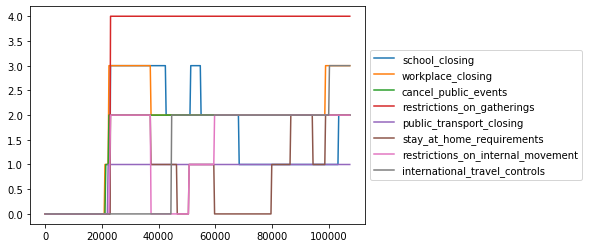

In [9]:
hist = Fr_gov.hist(bins=5)
hist = Fi_gov.hist(bins=5)
hist = Gr_gov.hist(bins=5)
hist = En_gov.hist(bins=5)

Fr_gov.groupby('restrictions_on_gatherings').count().plot()
Fi_gov.groupby('restrictions_on_gatherings').count().plot()#
Gr_gov.groupby('restrictions_on_gatherings').count().plot()
En_gov.groupby('restrictions_on_gatherings').count().plot()

Fr_gov.plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
Fi_gov.plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
Gr_gov.plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
En_gov.plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

### Epidemiology

In [10]:
epid_df = pd.read_csv('epidemiology.csv')

cols = ['date','key','new_confirmed','total_confirmed']#No Nan

Fr_epid = epid_df[epid_df['key'].isin(Fr_keys)][cols]#There is Nan 1504 rows
Fi_epid = epid_df[epid_df['key'].isin(Fi_keys)][cols]#No Nan
Gr_epid = epid_df[epid_df['key'].isin(Gr_keys)][cols]#No Nan
En_epid = epid_df[epid_df['key'].isin(En_keys)][cols]#No Nan
#Fi_epid

In [11]:
missing_values_percentage(Fr_epid)

,column name,percentage of missing
date,date,0.000000
key,key,0.000000
new_confirmed,new_confirmed,4.193854
total_confirmed,total_confirmed,0.000000


In [12]:
Fr_epid[Fr_epid.isna().any(axis=1)]
#En_epid.isnull().values.any()

,date,key,new_confirmed,total_confirmed
237499,2020-03-18,FR_ARA_03,NaN,0.0
237501,2020-03-18,FR_ARA_15,NaN,0.0
237504,2020-03-18,FR_ARA_42,NaN,0.0
237512,2020-03-18,FR_BFC_25,NaN,1.0
237524,2020-03-18,FR_BRE_56,NaN,0.0
...,...,...,...,...
4533094,2021-01-19,FR_PDL_44,NaN,38103.0
4533095,2021-01-19,FR_PDL_49,NaN,25605.0
4533096,2021-01-19,FR_PDL_53,NaN,9921.0
4533097,2021-01-19,FR_PDL_72,NaN,16341.0


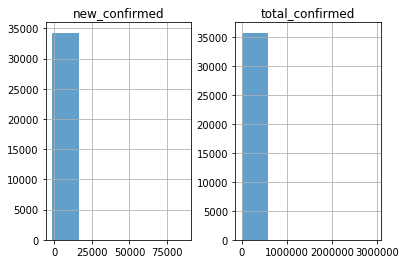

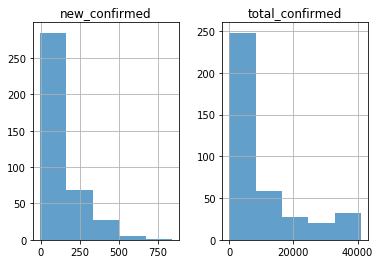

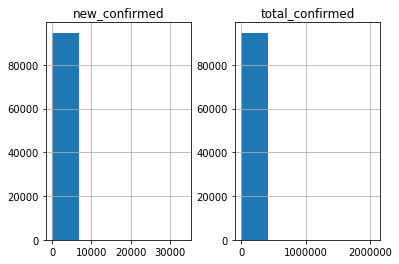

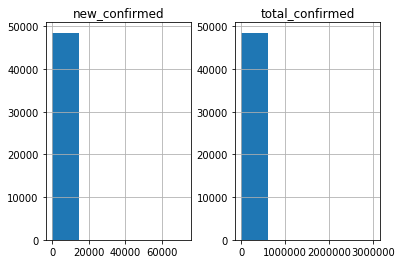

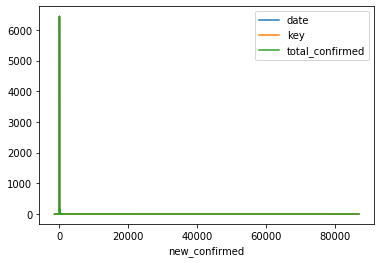

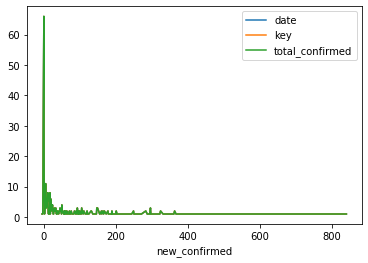

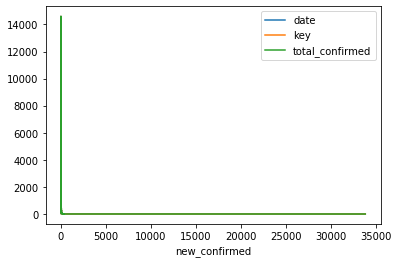

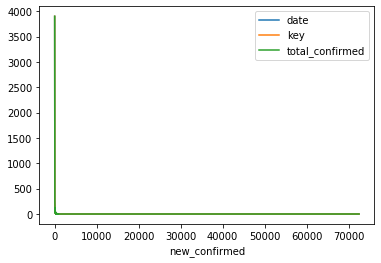

In [13]:
hist = Fr_epid.hist(bins=5, alpha=0.7)
hist = Fi_epid.hist(bins=5, alpha=0.7)
hist = Gr_epid.hist(bins=5)
hist = En_epid.hist(bins=5)

Fr_epid.groupby('new_confirmed').count().plot()
Fi_epid.groupby('new_confirmed').count().plot()
Gr_epid.groupby('new_confirmed').count().plot()
En_epid.groupby('new_confirmed').count().plot()

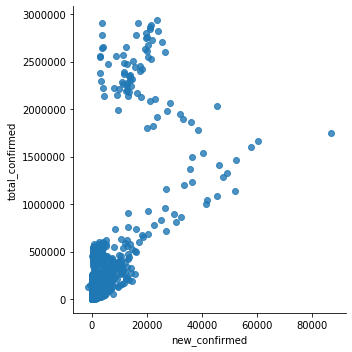

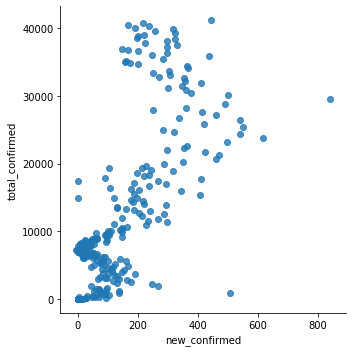

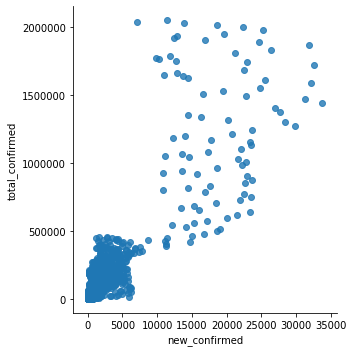

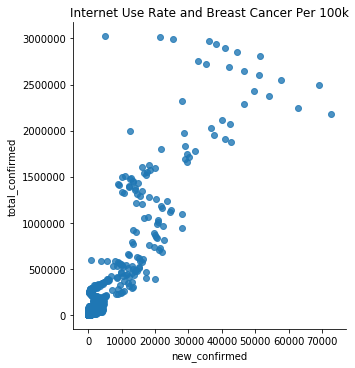

In [14]:
sns.lmplot(x="new_confirmed", y="total_confirmed", data=Fr_epid, fit_reg=False)
sns.lmplot(x="new_confirmed", y="total_confirmed", data=Fi_epid, fit_reg=False)
sns.lmplot(x="new_confirmed", y="total_confirmed", data=Gr_epid, fit_reg=False)
sns.lmplot(x="new_confirmed", y="total_confirmed", data=En_epid, fit_reg=False)

plt.title("Internet Use Rate and Breast Cancer Per 100k")
plt.show()

#### ANOVA : one variable is Categorical and one variable is Quantitative.

- https://www.statology.org/two-way-anova-python/

In [ ]:
def Regression_Anova(df, filename, Mode='Regression', Shift='0D'):
    for i in df.index:
        df.loc[i, "date"] = datetime.strptime(df.loc[i, "date"], '%Y-%m-%d')
    R_df = pd.read_csv('R_Metric/'+filename+'.csv')
    R_df = R_df.rename(columns={ R_df.columns[0]: "date" })

    R_df.date = pd.to_datetime(R_df.date)
    R_df = R_df.set_index(['date'])
    R_df = R_df.shift(freq=Shift)
    R_df = R_df.reset_index()    

    R_df = R_df[['date', 'R_mean']]
    R_df['date']=pd.to_datetime(R_df['date']).apply(lambda x: x.date())
    for i in R_df.index:
        R_df.loc[i, "date"]= datetime.strptime(str(R_df.loc[i, "date"]), '%Y-%m-%d')
    
    new_df = pd.merge(R_df, df)
    del new_df['key']


    if Mode == 'Regression':
        new_df["school_closing"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        new_df["workplace_closing"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        new_df["cancel_public_events"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        new_df["restrictions_on_gatherings"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        
        new_df["public_transport_closing"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        new_df["stay_at_home_requirements"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        new_df["restrictions_on_internal_movement"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)
        new_df["international_travel_controls"].replace({0.0: 0.0, 1.0: 0.33, 2.0: 0.66, 3.0: 1.0}, inplace=True)

        sns.heatmap(new_df.iloc[:, 1:10].corr(), annot=True, fmt=".2f")
        plt.show()
    elif Mode == 'Anova':
        new_df["school_closing"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        new_df["workplace_closing"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        new_df["cancel_public_events"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        new_df["restrictions_on_gatherings"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        
        new_df["public_transport_closing"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        new_df["stay_at_home_requirements"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        new_df["restrictions_on_internal_movement"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
        new_df["international_travel_controls"].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}, inplace=True)
    return new_df

def Regression_Continues(df, filename, Shift='0D'):
    for i in df.index:
        df.loc[i, "date"] = datetime.strptime(df.loc[i, "date"], '%Y-%m-%d')
    R_df = pd.read_csv('R_Metric/'+filename+'.csv')
    R_df = R_df.rename(columns={ R_df.columns[0]: "date" })

    R_df.date = pd.to_datetime(R_df.date)
    R_df = R_df.set_index(['date'])
    R_df = R_df.shift(freq=Shift)
    R_df = R_df.reset_index()    

    R_df = R_df[['date', 'R_mean']]
    R_df['date']=pd.to_datetime(R_df['date']).apply(lambda x: x.date())
    for i in R_df.index:
        R_df.loc[i, "date"]= datetime.strptime(str(R_df.loc[i, "date"]), '%Y-%m-%d')
    
    new_df = pd.merge(R_df, df)
    del new_df['key']
    sns.heatmap(new_df.iloc[:, 1:10].corr(), annot=True, fmt=".2f")
    plt.show()
    
    return new_df

Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries()
df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Anova', Shift='7D')
df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Anova', Shift='7D')
df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Anova', Shift='7D')
df_En = Regression_Anova(En_gov,'R_England', Mode='Anova', Shift='7D')

#Formula = 'R_mean ~ C(school_closing) + C(workplace_closing) + C(cancel_public_events) + C(restrictions_on_gatherings)'
Formula = """R_mean ~ C(school_closing) + C(workplace_closing) + C(cancel_public_events) + C(restrictions_on_gatherings) 
+ C(public_transport_closing) + C(stay_at_home_requirements) + C(restrictions_on_internal_movement) + C(international_travel_controls)"""

In [ ]:
#perform two-way ANOVA
#model = ols(Formula, data=df_Fr).fit()
#sm.stats.anova_lm(model, type=2)

In [ ]:
#model = ols(Formula, data=df_Fi).fit()
#sm.stats.anova_lm(model, type=2)

In [ ]:
#model = ols(Formula, data=df_Gr).fit()
#sm.stats.anova_lm(model, typ=2)

In [ ]:
#model = ols(Formula, data=df_En).fit()
#sm.stats.anova_lm(model, typ=2)

- We Notice that there is a high variability in terms of the factors that impact the R, such as:

## France
- (workplace_closing = 0.5) > (p-value = 0.05) does not affect R. Therfore, no significance effect.

## Finland 
- All good.

## Germany 
- (workplace_closing = 0.5) > (p-value = 0.05) does not affect R. Therfore, no significance effect.<br>
- (cancel_public_events = 0.11) > (p-value = 0.05) does not affect R. Therfore, no significance effect.<br>
- (restrictions_on_gatherings = 0.168) > (p-value = 0.05) does not affect R. Therfore, no significance effect.<br>
           
## England
- (cancel_public_events = 0.74) > (p-value = 0.05) does not affect R. Therfore, no significance effect.<br>
- (restrictions_on_gatherings = 0.09) > (p-value = 0.05) does not affect R. Therfore, no significance effect.<br>  

In [16]:
def Results(Target, preds, Method='Linear Regression'):
    Error = mean_absolute_error(Target, preds)
    mae = round(1 - Error,4)
    print(Method,"Error =", round(Error,4)," Performance =", mae)
    
def SVR_Grid(X_train, y_train, X_test, y_test):
    parameters = {'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}

    model = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5)
    #model = RandomizedSearchCV(SVR(kernel='rbf', epsilon = 0.01), param_distributions = parameters, n_iter = 1, verbose = 2, n_jobs = -1)
    #model = SVR(kernel='rbf', epsilon = 0.01)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    Results(y_test, preds, Method='SVR')

def Decision_Tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeRegressor(max_depth=6)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    Results(y_test, preds, Method='Decision Tree')
    
def Random_Forest(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators = 300)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    Results(y_test, preds, Method='Random Forest')
        
def GradientBoosting(X_train, y_train, X_test, y_test):
    param_grid = {"learning_rate" : [0.01, 0.1, 0.3], "subsample" : [0.5, 1.0],
              "max_depth"        : [3, 4, 5, 10, 15, 20],"max_features" : ['auto', 'sqrt'],
              "min_samples_split": [5, 10, 20, 40], "min_samples_leaf" : [2, 6, 12, 24]}
    grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 0, n_jobs = -1)
    grad_reg.fit(X_train, y_train)

    preds = grad_reg.predict(X_test)
    Results(y_test, preds, Method='GBoost')

def XGradientBoosting(df, X_train, y_train, X_test, y_test):
    param_grid = {"learning_rate" : [0.01, 0.1, 0.3] , "max_depth" : [3, 4, 5, 10, 15, 20],
                  "min_child_weight" : [1, 3, 5, 7],"gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
                  "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]}
    xgb_reg = RandomizedSearchCV(XGBRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 0, n_jobs = -1)
    xgb_reg.fit(X_train, y_train)

    preds = xgb_reg.predict(X_test)
    Results(y_test, preds, Method='XGBoost')
    
    importance = xgb_reg.best_estimator_.feature_importances_
    # summarize feature importance
    #print(len(list(df.columns)[2:]), list(importance))
    # plot feature importance
    sorted_idx = np.argsort(importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.barh(pos, importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(list(df.columns)[2:])[sorted_idx])
    plt.title('Feature Importance')
    plt.show()

In [17]:
def Solve_Regression(df, Country):
    print('_____________'+Country+'_____________')

    train, test = train_test_split(df.dropna(), test_size=0.2)

    X_train = train.iloc[:, 2:].to_numpy()
    y_train = train['R_mean'].to_numpy()

    X_test = test.iloc[:, 2:].to_numpy()
    y_test = test['R_mean'].to_numpy()

    Decision_Tree(X_train, y_train, X_test, y_test)
    Random_Forest(X_train, y_train, X_test, y_test)
    SVR_Grid(X_train, y_train, X_test, y_test)
    GradientBoosting(X_train, y_train, X_test, y_test)
    XGradientBoosting(df, X_train, y_train, X_test, y_test)
    
#Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries()
#df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Regression')
#df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Regression')
#df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Regression')
#df_EN = Regression_Anova(En_gov,'R_England', Mode='Regression')

#Solve_Regression(df_Fr, 'France')
#Solve_Regression(df_Fi, 'Finland')
#Solve_Regression(df_Gr, 'Germany')
#Solve_Regression(df_EN, 'England')

#Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries()
#df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Regression', Shift='7D')
#df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Regression', Shift='7D')
#df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Regression', Shift='7D')
#df_EN = Regression_Anova(En_gov,'R_England', Mode='Regression', Shift='7D')

#Solve_Regression(df_Fr, 'France')
#Solve_Regression(df_Fi, 'Finland')
#Solve_Regression(df_Gr, 'Germany')
#Solve_Regression(df_EN, 'England')

#Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries()
#df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Regression', Shift='10D')
#df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Regression', Shift='10D')
#df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Regression', Shift='10D')
#df_EN = Regression_Anova(En_gov,'R_England', Mode='Regression', Shift='10D')

#Solve_Regression(df_Fr, 'France')
#Solve_Regression(df_Fi, 'Finland')
#Solve_Regression(df_Gr, 'Germany')
#Solve_Regression(df_EN, 'England')

#Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries()
#df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Regression', Shift='15D')
#df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Regression', Shift='15D')
#df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Regression', Shift='15D')
#df_EN = Regression_Anova(En_gov,'R_England', Mode='Regression', Shift='15D')

#Solve_Regression(df_Fr, 'France')
#Solve_Regression(df_Fi, 'Finland')
#Solve_Regression(df_Gr, 'Germany')
#Solve_Regression(df_EN, 'England')

# Weather

In [ ]:
Fr_W = pd.read_csv('FranceWeather.csv')
Fr_W

In [ ]:
#Fr_W = pd.read_csv('FranceWeather.csv')
Fr_W.columns

In [ ]:
#def get_Countries_Weather():   
Fr_W = pd.read_csv('FranceWeather.csv')
Fi_W = pd.read_csv('FinlandWeather.csv')
Gr_W = pd.read_csv('GermanyWeather.csv')
En_W = pd.read_csv('EnglandWeather.csv')
Fr_W = Fr_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
Fi_W = Fi_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
Gr_W = Gr_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
En_W = En_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()


Fr_W = pd.read_csv('FranceWeather.csv')
Fi_W = pd.read_csv('FinlandWeather.csv')
Gr_W = pd.read_csv('GermanyWeather.csv')
En_W = pd.read_csv('EnglandWeather.csv')
Fr_W = Fr_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
Fi_W = Fi_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
Gr_W = Gr_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
En_W = En_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
#Fr_W, Fi_W, Gr_W, En_W = get_Countries_Weather()
Fr_W = Regression_Continues(Fr_W,'R_France', Shift='-10D')
Fi_W = Regression_Continues(Fi_W,'R_Finland', Shift='-10D')
Gr_W = Regression_Continues(Gr_W,'R_Germany', Shift='-10D')
En_W = Regression_Continues(En_W,'R_England', Shift='-10D')


Fr_W = pd.read_csv('FranceWeather.csv')
Fi_W = pd.read_csv('FinlandWeather.csv')
Gr_W = pd.read_csv('GermanyWeather.csv')
En_W = pd.read_csv('EnglandWeather.csv')
Fr_W = Fr_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
Fi_W = Fi_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
Gr_W = Gr_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
En_W = En_W[['date', 'key', 'average_temperature', 'rainfall', 'relative_humidity']].copy()
#Fr_W, Fi_W, Gr_W, En_W = get_Countries_Weather()
Fr_W = Regression_Continues(Fr_W,'R_France', Shift='-15D')
Fi_W = Regression_Continues(Fi_W,'R_Finland', Shift='-15D')
Gr_W = Regression_Continues(Gr_W,'R_Germany', Shift='-15D')
En_W = Regression_Continues(En_W,'R_England', Shift='-15D')


In [ ]:
df = pd.read_csv('index.csv')

Fr_keys = df[df['country_name'] == 'France']['key'].to_list()
Fi_keys = df[df['country_name'] == 'Finland']['key'].to_list()
Gr_keys = df[df['country_name'] == 'Germany']['key'].to_list()
En_keys = df.query("country_code == 'GB' & subregion1_code == 'ENG'")['key'].to_list()

df_w = pd.read_csv('weather/weather.csv')

cols = ['date','key','average_temperature','rainfall','relative_humidity']

Fr_W = df_w[df_w['key'].isin(Fr_keys)][cols]#No Nan
Fi_W = df_w[df_w['key'].isin(Fi_keys)][cols]#No Nan
Gr_W = df_w[df_w['key'].isin(Gr_keys)][cols]#No Nan
En_W = df_w[df_w['key'].isin(En_keys)][cols]#There is Nan 2 rows

Fr_W.to_csv('weather/FranceWeather.csv')
Fi_W.to_csv('weather/FinlandWeather.csv')
Gr_W.to_csv('weather/GermanyWeather.csv')
En_W.to_csv('weather/EnglandWeather.csv')

# Mobility

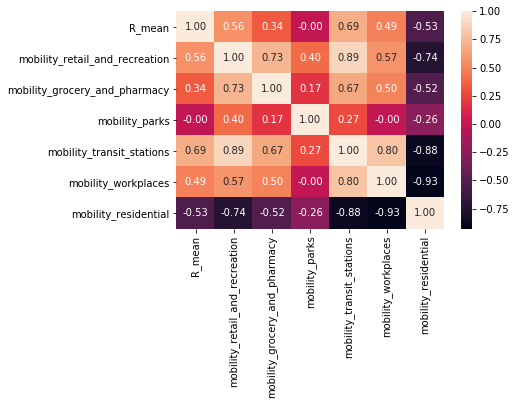

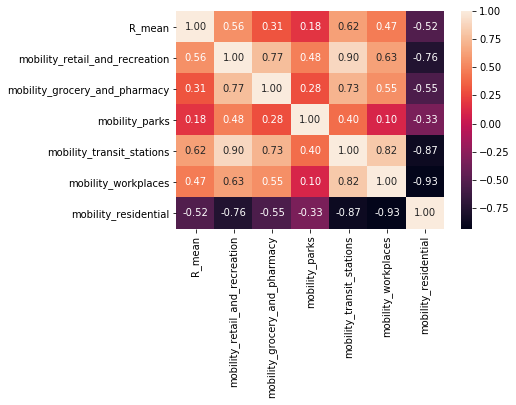

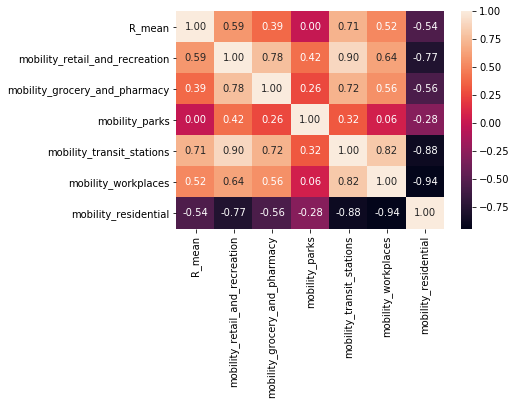

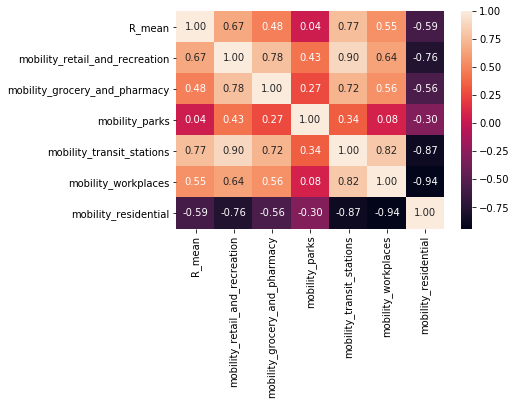

_____________France_____________
Decision Tree Error = 0.1742  Performance = 0.8258
Random Forest Error = 0.1409  Performance = 0.8591
SVR Error = 0.1662  Performance = 0.8338
GBoost Error = 0.1482  Performance = 0.8518
XGBoost Error = 0.1562  Performance = 0.8438


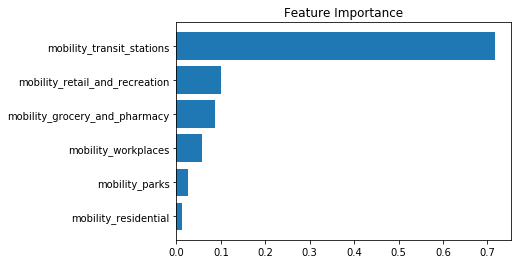

_____________Finland_____________
Decision Tree Error = 0.1265  Performance = 0.8735
Random Forest Error = 0.1077  Performance = 0.8923
SVR Error = 0.1129  Performance = 0.8871
GBoost Error = 0.1033  Performance = 0.8967
XGBoost Error = 0.1057  Performance = 0.8943


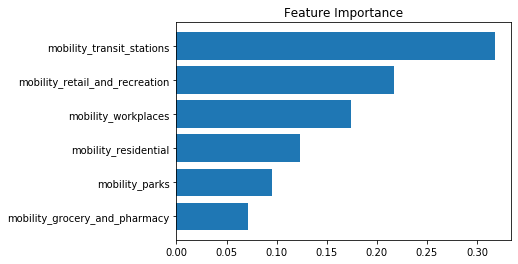

_____________Germany_____________
Decision Tree Error = 0.1648  Performance = 0.8352
Random Forest Error = 0.1687  Performance = 0.8313
SVR Error = 0.189  Performance = 0.811
GBoost Error = 0.1988  Performance = 0.8012
XGBoost Error = 0.1701  Performance = 0.8299


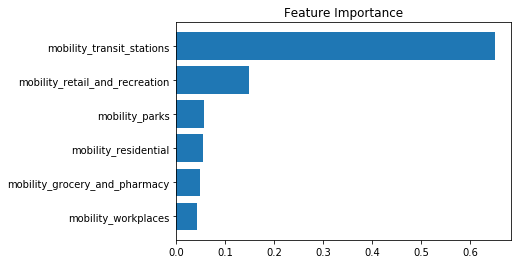

_____________England_____________
Decision Tree Error = 0.1023  Performance = 0.8977
Random Forest Error = 0.0958  Performance = 0.9042
SVR Error = 0.1225  Performance = 0.8775
GBoost Error = 0.0995  Performance = 0.9005
XGBoost Error = 0.0979  Performance = 0.9021


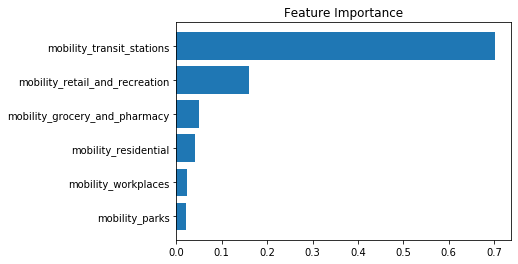

In [22]:
def Solve_Regression_M(df, Country):
    print('_____________'+Country+'_____________')

    train, test = train_test_split(df.dropna(), test_size=0.2)

    X_train = train.iloc[:, 2:].to_numpy()
    y_train = train['R_mean'].to_numpy()

    X_test = test.iloc[:, 2:].to_numpy()
    y_test = test['R_mean'].to_numpy()

    Decision_Tree(X_train, y_train, X_test, y_test)
    Random_Forest(X_train, y_train, X_test, y_test)
    SVR_Grid(X_train, y_train, X_test, y_test)
    GradientBoosting(X_train, y_train, X_test, y_test)
    XGradientBoosting(df, X_train, y_train, X_test, y_test)

def get_Countries_Mobility():
    df = pd.read_csv('index.csv')
    
    Fr_keys = df[df['country_name'] == 'France']['key'].to_list()
    Fi_keys = df[df['country_name'] == 'Finland']['key'].to_list()
    Gr_keys = df[df['country_name'] == 'Germany']['key'].to_list()
    En_keys = df.query("country_code == 'GB' & subregion1_code == 'ENG'")['key'].to_list()
    
    Fr_M = pd.read_csv('France_mobility.csv')
    Fi_M = pd.read_csv('Finland_mobility.csv')
    Gr_M = pd.read_csv('Germany_mobility.csv')
    En_M = pd.read_csv('UnitedKingdom_mobility.csv')

    return Fr_M, Fi_M, Gr_M, En_M



Fr_M, Fi_M, Gr_M, En_M = get_Countries_Mobility()
Fr_M = Regression_Continues(Fr_M,'R_France', Shift='-7D')
Fi_M = Regression_Continues(Fi_M,'R_Finland', Shift='-7D')
Gr_M = Regression_Continues(Gr_M,'R_Germany', Shift='-7D')
En_M = Regression_Continues(En_M,'R_England', Shift='-7D')

Solve_Regression(Fr_M, 'France')
Solve_Regression(Fi_M, 'Finland')
Solve_Regression(Gr_M, 'Germany')
Solve_Regression(En_M, 'England')

In [ ]:
plt.figure(figsize=(12,10))
cor = En_W.iloc[:, 1:5].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor["R_mean"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
X = Fr_W.iloc[:, 2:5]
X

In [ ]:
X = Fr_W.iloc[:, 2:5]
y = Fr_W.iloc[:, 1]

reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 
    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)
    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

feature_df = PolynomialFeatures_labeled(Fr_W.iloc[:, 2:5],2)
feature_df['R_mean'] = Fr_W['R_mean'].values
sns.heatmap(feature_df.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:

feature_df = PolynomialFeatures_labeled(Fr_W.iloc[:, 2:5],2)
X = feature_df
y = Fr_W.iloc[:, 1]

reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# 10 days forcast 

# Only with goverment response

In [23]:
seed=42

def Results(Target, preds, Method='Linear Regression'):
    Error = mean_absolute_error(Target, preds)
    mae = round(1 - Error,4)
    print(Method,"Error =", round(Error,4)," Performance =", mae)
    
def SVR_Grid_10days(X_train, y_train, X_test, y_test):
    parameters = {'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}

    model = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5)
    #model = RandomizedSearchCV(SVR(kernel='rbf', epsilon = 0.01), param_distributions = parameters, n_iter = 1, verbose = 2, n_jobs = -1)
    #model = SVR(kernel='rbf', epsilon = 0.01)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    Results(y_test, preds, Method='SVR')

def Decision_Tree_10days(X_train, y_train, X_test, y_test):
    model = DecisionTreeRegressor()
    param_grid = {'max_depth': np.arange(3, 10)}
    tree = GridSearchCV(model, param_grid)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    Results(y_test, preds, Method='Decision Tree')
    
def Random_Forest_10days(X_train, y_train, X_test, y_test):
    #def gini(p):
    #   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
    model = RandomForestRegressor(n_estimators = 300)
    param_grid = { "n_estimators"      : [250, 300],
           #"criterion"         : ["gini", "entropy"],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
    grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
    grid_search.fit(X_train, y_train)
    preds = grid_search.predict(X_test)
    Results(y_test, preds, Method='Random Forest')
        
def GradientBoosting_10days(X_train, y_train, X_test, y_test):

    parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
    scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}
    clf = GridSearchCV(GradientBoostingRegressor(), parameters,scoring=scoring,refit=True,cv=2, n_jobs=-1)    
    clf .fit(X_train, y_train)
    preds = clf .predict(X_test)
    Results(y_test, preds, Method='GBoost')

def XGradientBoosting_10days(df, X_train, y_train, X_test, y_test):
    xgbr = xgboost.XGBRegressor(random_state=seed) 
    xgbr_params = {  
    "learning_rate": [0.001, 0.01, 0.1],
    "min_samples_leaf": [50, 100],
    "max_depth":[5, 10, 20],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3]}
    
    fs_xgbr = RandomizedSearchCV(xgbr, xgbr_params, cv=5, iid=False, n_jobs=-1)
    fs_xgbr.fit(X_train, y_train)
    preds = fs_xgbr.predict(X_test)
    Results(y_test, preds, Method='XGBoost')

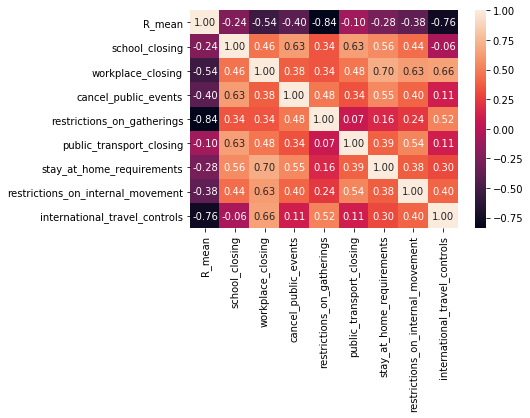

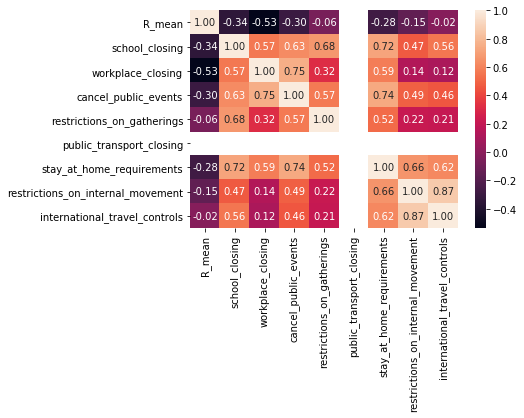

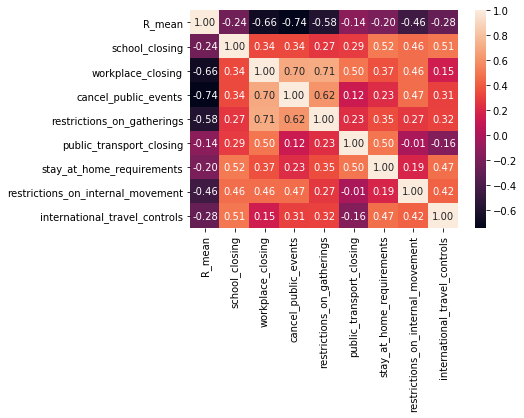

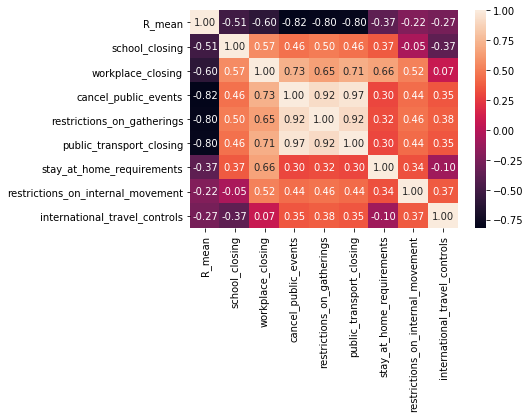

_____________France_____________
Decision Tree Error = 0.1744  Performance = 0.8256
Random Forest Error = 0.1744  Performance = 0.8256
SVR Error = 0.0723  Performance = 0.9277


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.1746  Performance = 0.8254
_____________Finland_____________
Decision Tree Error = 0.0372  Performance = 0.9628
Random Forest Error = 0.0364  Performance = 0.9636
SVR Error = 0.0393  Performance = 0.9607


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.0336  Performance = 0.9664
_____________Germany_____________
Decision Tree Error = 0.2048  Performance = 0.7952
Random Forest Error = 0.2022  Performance = 0.7978
SVR Error = 0.2537  Performance = 0.7463


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.1687  Performance = 0.8313
_____________England_____________
Decision Tree Error = 0.0862  Performance = 0.9138
Random Forest Error = 0.0499  Performance = 0.9501
SVR Error = 0.1068  Performance = 0.8932
[03:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [30]:
def Solve_Regression_10_forcast(df, Country):
    print('_____________'+Country+'_____________')
    df['date'] = pd.to_datetime(df['date'])  
    mask_training = (df['date'] > '2020-12-01') & (df['date'] <= '2020-12-20')
    mask_testing= (df['date'] > '2020-12-21') & (df['date'] <= '2020-12-30')
    #df = df.loc[mask]

    train, test = train_test_split(df.dropna(), test_size=0.2)

    X_train = train.iloc[:, 2:]
    Xtrain_masked=X_train.loc[mask_training].to_numpy()
    y_train = train['R_mean']
    y_train_masked=y_train.loc[mask_training].to_numpy()

    X_test = test.iloc[:, 2:]
    X_test_masked=X_test.loc[mask_testing].to_numpy()
    y_test = test['R_mean']
    y_test_masked=y_test.loc[mask_testing].to_numpy()
    
    Decision_Tree_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    Random_Forest_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    SVR_Grid_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    #GradientBoosting_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    XGradientBoosting_10days(df, Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    

Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries_goverment()
df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Regression', Shift='7D')
df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Regression', Shift='7D')
df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Regression', Shift='7D')
df_EN = Regression_Anova(En_gov,'R_England', Mode='Regression', Shift='7D')
Solve_Regression_10_forcast(df_Fr, 'France')
Solve_Regression_10_forcast(df_Fi, 'Finland')
Solve_Regression_10_forcast(df_Gr, 'Germany')
Solve_Regression_10_forcast(df_EN, 'England')

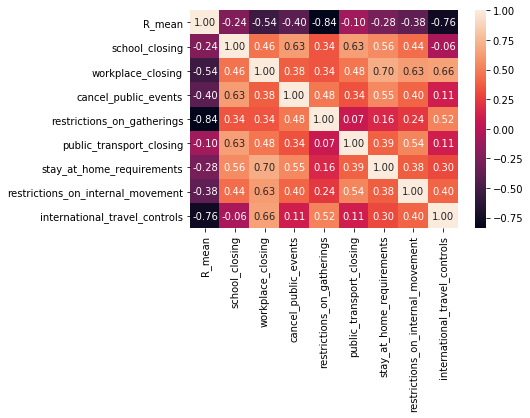

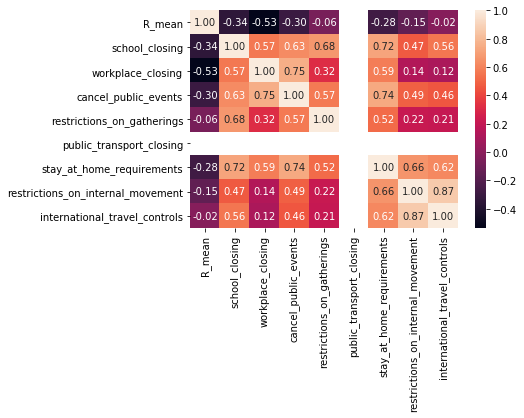

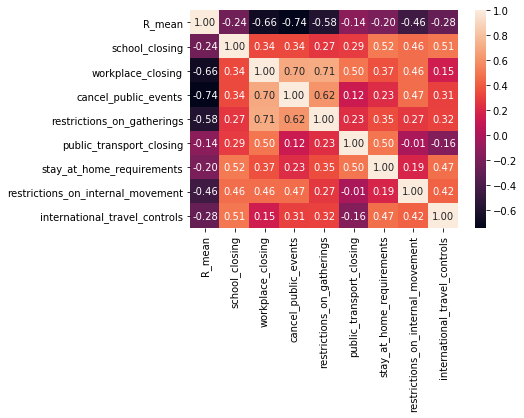

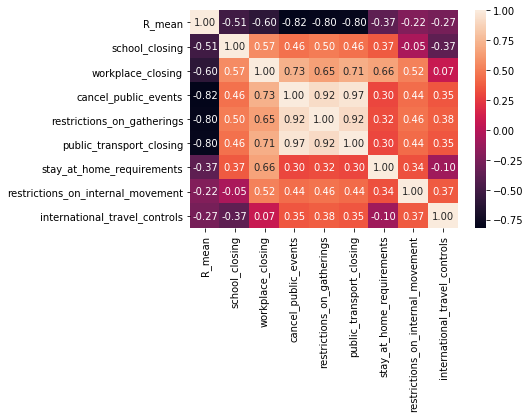

_____________France_____________
Decision Tree Error = 0.0619  Performance = 0.9381
Random Forest Error = 0.0619  Performance = 0.9381
SVR Error = 0.0619  Performance = 0.9381


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[12:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.0619  Performance = 0.9381
_____________Finland_____________
Decision Tree Error = 0.0342  Performance = 0.9658
Random Forest Error = 0.0346  Performance = 0.9654
SVR Error = 0.0396  Performance = 0.9604


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[12:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.1076  Performance = 0.8924
_____________Germany_____________
Decision Tree Error = 0.078  Performance = 0.922
Random Forest Error = 0.078  Performance = 0.922
SVR Error = 0.079  Performance = 0.921


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[12:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.0152  Performance = 0.9848
_____________England_____________
Decision Tree Error = 0.1376  Performance = 0.8624
Random Forest Error = 0.137  Performance = 0.863
SVR Error = 0.1672  Performance = 0.8328
[12:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [33]:
def Solve_Regression_10_forcast(df, Country):
    print('_____________'+Country+'_____________')
    df['date'] = pd.to_datetime(df['date'])  
    mask_training = (df['date'] > '2020-09-01') & (df['date'] <= '2020-09-20')
    mask_testing= (df['date'] > '2020-09-21') & (df['date'] <= '2020-09-30')
    #df = df.loc[mask]

    train, test = train_test_split(df.dropna(), test_size=0.2)

    X_train = train.iloc[:, 2:]
    Xtrain_masked=X_train.loc[mask_training].to_numpy()
    y_train = train['R_mean']
    y_train_masked=y_train.loc[mask_training].to_numpy()

    X_test = test.iloc[:, 2:]
    X_test_masked=X_test.loc[mask_testing].to_numpy()
    y_test = test['R_mean']
    y_test_masked=y_test.loc[mask_testing].to_numpy()
    
    Decision_Tree_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    Random_Forest_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    SVR_Grid_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    #GradientBoosting_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    XGradientBoosting_10days(df, Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    

Fr_gov, Fi_gov, Gr_gov, En_gov = get_Countries_goverment()
df_Fr = Regression_Anova(Fr_gov,'R_France', Mode='Regression', Shift='7D')
df_Fi = Regression_Anova(Fi_gov,'R_Finland', Mode='Regression', Shift='7D')
df_Gr = Regression_Anova(Gr_gov,'R_Germany', Mode='Regression', Shift='7D')
df_EN = Regression_Anova(En_gov,'R_England', Mode='Regression', Shift='7D')
Solve_Regression_10_forcast(df_Fr, 'France')
Solve_Regression_10_forcast(df_Fi, 'Finland')
Solve_Regression_10_forcast(df_Gr, 'Germany')
Solve_Regression_10_forcast(df_EN, 'England')

# Mobility 10 days forcast 

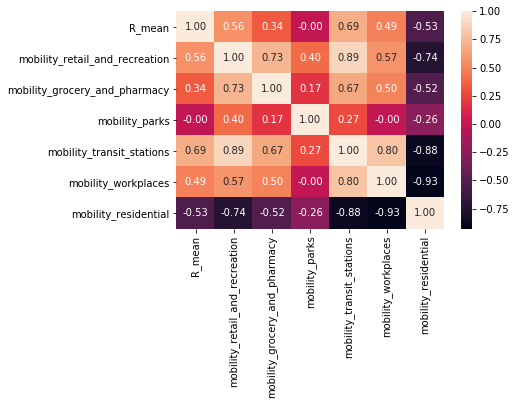

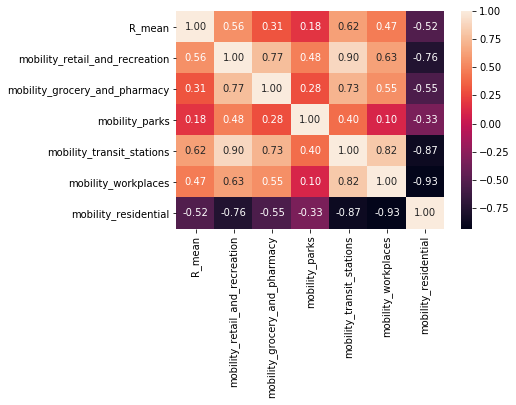

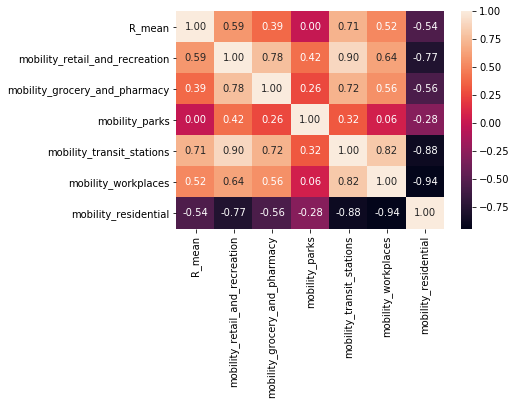

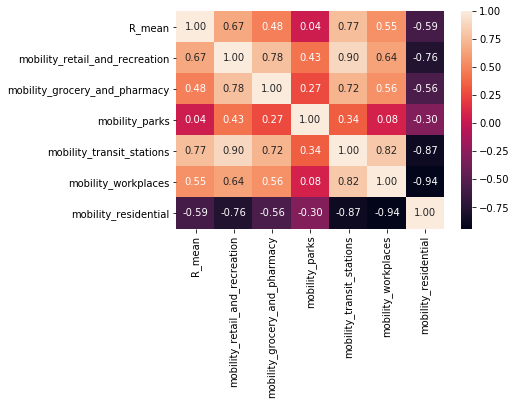

_____________France_____________
Decision Tree Error = 0.1858  Performance = 0.8142
Random Forest Error = 0.2067  Performance = 0.7933
SVR Error = 0.1446  Performance = 0.8554


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.3301  Performance = 0.6699
_____________Finland_____________
Decision Tree Error = 0.047  Performance = 0.953
Random Forest Error = 0.0018  Performance = 0.9982
SVR Error = 0.0004  Performance = 0.9996


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:25:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.07  Performance = 0.93
_____________Germany_____________
Decision Tree Error = 0.305  Performance = 0.695
Random Forest Error = 0.2596  Performance = 0.7404
SVR Error = 0.2521  Performance = 0.7479


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.3687  Performance = 0.6313
_____________England_____________
Decision Tree Error = 0.11  Performance = 0.89
Random Forest Error = 0.1246  Performance = 0.8754
SVR Error = 0.1586  Performance = 0.8414
[03:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cas

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [26]:
def Solve_Regression_10_forcast(df, Country):
    print('_____________'+Country+'_____________')
    df['date'] = pd.to_datetime(df['date'])  
    mask_training = (df['date'] > '2020-09-01') & (df['date'] <= '2020-09-20')
    mask_testing= (df['date'] > '2020-09-21') & (df['date'] <= '2020-09-30')
    #df = df.loc[mask]

    train, test = train_test_split(df.dropna(), test_size=0.2)

    X_train = train.iloc[:, 2:]
    Xtrain_masked=X_train.loc[mask_training].to_numpy()
    y_train = train['R_mean']
    y_train_masked=y_train.loc[mask_training].to_numpy()

    X_test = test.iloc[:, 2:]
    X_test_masked=X_test.loc[mask_testing].to_numpy()
    y_test = test['R_mean']
    y_test_masked=y_test.loc[mask_testing].to_numpy()
    
    Decision_Tree_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    Random_Forest_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    SVR_Grid_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    #GradientBoosting_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    XGradientBoosting_10days(df, Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    

Fr_M, Fi_M, Gr_M, En_M = get_Countries_Mobility()
df_Fr = Regression_Continues(Fr_M,'R_France', Shift='-7D')
df_Fi = Regression_Continues(Fi_M,'R_Finland', Shift='-7D')
df_Gr = Regression_Continues(Gr_M,'R_Germany',  Shift='-7D')
df_EN = Regression_Continues(En_M,'R_England', Shift='-7D')
Solve_Regression_10_forcast(df_Fr, 'France')
Solve_Regression_10_forcast(df_Fi, 'Finland')
Solve_Regression_10_forcast(df_Gr, 'Germany')
Solve_Regression_10_forcast(df_EN, 'England')

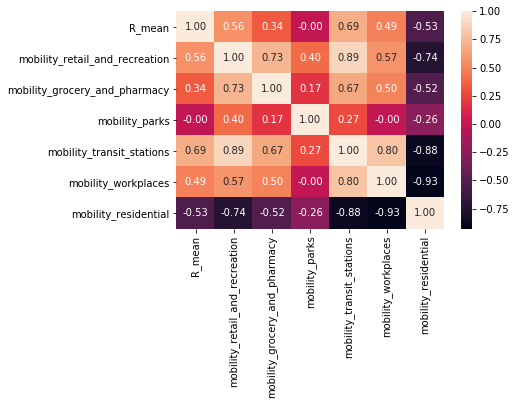

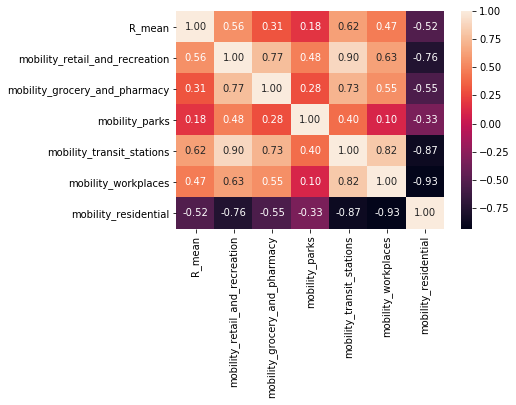

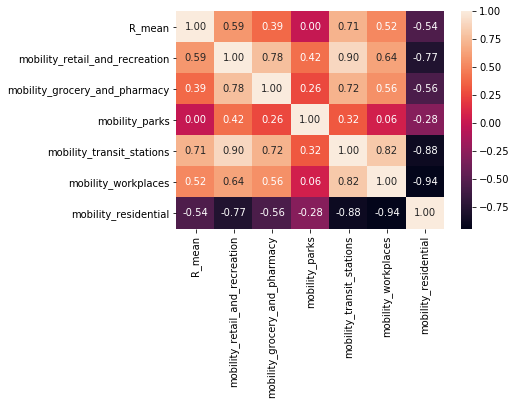

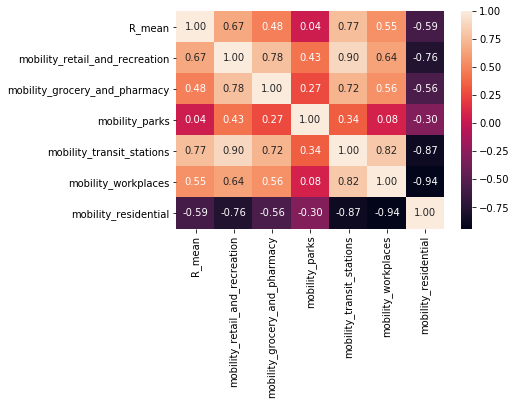

_____________France_____________
Decision Tree Error = 0.101  Performance = 0.899
Random Forest Error = 0.1069  Performance = 0.8931
SVR Error = 0.1076  Performance = 0.8924


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.2168  Performance = 0.7832
_____________Finland_____________
Decision Tree Error = 0.1501  Performance = 0.8499
Random Forest Error = 0.1361  Performance = 0.8639
SVR Error = 0.027  Performance = 0.973


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.2576  Performance = 0.7424
_____________Germany_____________
Decision Tree Error = 0.3186  Performance = 0.6814
Random Forest Error = 0.2102  Performance = 0.7898
SVR Error = 0.2376  Performance = 0.7624


C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[03:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Error = 0.3299  Performance = 0.6701
_____________England_____________
Decision Tree Error = 0.3157  Performance = 0.6843
Random Forest Error = 0.3766  Performance = 0.6234
SVR Error = 0.3413  Performance = 0.6587
[03:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above

C:\Users\narhab18\Anaconda3\envs\twitter\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [29]:
def Solve_Regression_10_forcast(df, Country):
    print('_____________'+Country+'_____________')
    df['date'] = pd.to_datetime(df['date'])  
    mask_training = (df['date'] > '2020-12-01') & (df['date'] <= '2020-12-20')
    mask_testing= (df['date'] > '2020-12-21') & (df['date'] <= '2020-12-30')
    #df = df.loc[mask]

    train, test = train_test_split(df.dropna(), test_size=0.2)

    X_train = train.iloc[:, 2:]
    Xtrain_masked=X_train.loc[mask_training].to_numpy()
    y_train = train['R_mean']
    y_train_masked=y_train.loc[mask_training].to_numpy()

    X_test = test.iloc[:, 2:]
    X_test_masked=X_test.loc[mask_testing].to_numpy()
    y_test = test['R_mean']
    y_test_masked=y_test.loc[mask_testing].to_numpy()
    
    Decision_Tree_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    Random_Forest_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    SVR_Grid_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    #GradientBoosting_10days(Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    XGradientBoosting_10days(df, Xtrain_masked, y_train_masked, X_test_masked, y_test_masked)
    

Fr_M, Fi_M, Gr_M, En_M = get_Countries_Mobility()
df_Fr = Regression_Continues(Fr_M,'R_France', Shift='-7D')
df_Fi = Regression_Continues(Fi_M,'R_Finland', Shift='-7D')
df_Gr = Regression_Continues(Gr_M,'R_Germany',  Shift='-7D')
df_EN = Regression_Continues(En_M,'R_England', Shift='-7D')
Solve_Regression_10_forcast(df_Fr, 'France')
Solve_Regression_10_forcast(df_Fi, 'Finland')
Solve_Regression_10_forcast(df_Gr, 'Germany')
Solve_Regression_10_forcast(df_EN, 'England')

In [ ]:


seed=42

gbr = GradientBoostingRegressor(random_state=seed)
gbr_params = {
    "learning_rate": [0.001, 0.01, 0.1],
    "min_samples_split": [50, 100],
    "min_samples_leaf": [50, 100],
    "max_depth":[5, 10, 20]}

xgbr = xgboost.XGBRegressor(random_state=seed) 
xgbr_params = {  
    "learning_rate": [0.001, 0.01, 0.1],
    "min_samples_leaf": [50, 100],
    "max_depth":[5, 10, 20],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3]}

rfr = RandomForestRegressor(random_state=seed)
rfr_params={'n_estimators':[100, 500, 1000], 
             'max_features':[10,14,18],
             'min_samples_split': [50, 100],
             'min_samples_leaf': [50, 100],} 

fs_xgbr = RandomizedSearchCV(xgbr, xgbr_params, cv=5, iid=False, n_jobs=-1)
fs_gbr = RandomizedSearchCV(gbr, gbr_params, cv=5,iid=False, n_jobs=-1)
fs_rfr = RandomizedSearchCV(rfr, rfr_params, cv=5,iid=False, n_jobs=-1)

X, y = make_regression(1000,10)

fs_xgbr.fit(X, y)
fs_gbr.fit(X, y)
fs_rfr.fit(X, y)

model = SelectFromModel(fs_rfr.best_estimator_, prefit=True)
X_rfr = model.transform(X)
print('rfr', X_rfr.shape)

model = SelectFromModel(fs_xgbr.best_estimator_, prefit=True)
X_xgbr = model.transform(X)
print('xgbr', X_xgbr.shape)

model = SelectFromModel(fs_gbr.best_estimator_, prefit=True)
X_gbr = model.transform(X)
print('gbr', X_gbr.shape)

rfr (1000, 3)
xgbr (1000, 3)
gbr (1000, 4)